In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv("Scarpe_Sportive.csv", encoding='utf-8')

In [23]:
df

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori
0,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,MORPHIC,scarpe da corsa su strada,white-warm white-sun struck
1,Scarpe Sportive,35.5,uomo,PUMA,PROSPECT UNISEX - Scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,PROSPECT UNISEX,scarpe da allenamento,black/yellow alert/white
2,Scarpe Sportive,35.5,uomo,PUMA,PWR HYBRID TR UNISEX - Scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,PWR HYBRID TR UNISEX,scarpe da allenamento,black- white- black
3,Scarpe Sportive,35.5,uomo,UNDER ARMOUR,JET '23 - Scarpe da basket - black,60.00,60.00,https://www.zalando.it/under-armour-court-perf...,JET '23,scarpe da basket,black
4,Scarpe Sportive,35.5,uomo,PUMA,ELIMINATE TURBO - Scarpe da pallamano - white/...,101.99,119.99,https://www.zalando.it/puma-eliminate-turbo-sc...,ELIMINATE TURBO,scarpe da pallamano,white/bluemazing
...,...,...,...,...,...,...,...,...,...,...,...
15284,Scarpe Sportive,47.0,donna,UNDER ARMOUR,Scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,Unknown,scarpe da corsa su strada,white
15285,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,Unknown,scarpe da allenamento,white/black
15286,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,Unknown,scarpe da allenamento,sun stream black caramel latte
15287,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,Unknown,scarpe da allenamento,black/white


### Raggruppo per la categoria sportiva e per marca e calcolo il prezzo ordinario e il prezzo effetivo per ogni categoria

In [29]:
# raggruppa i dati per categoria di sport
raggruppa_sport_marca = df.groupby(['sport', 'marca'])[['prezzo_effettivo', 'prezzo_ordinario']].sum()

In [31]:
raggruppa_sport_marca  = raggruppa_sport_marca .sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])
raggruppa_sport_marca 

,,prezzo_effettivo,prezzo_ordinario
sport,marca,,
scarpe da trail running,JOMA,50.00,50.00
Scarpe da corsa su strada,UNDER ARMOUR,160.00,160.00
scarpe da corsa su strada,JOMA,238.65,238.65
scarpe da calcetto,DIADORA,364.95,364.95
scarpa da hiking,PUMA,414.75,550.00
...,...,...,...
scarpe da corsa su strada,PUMA,92676.81,110342.47
sneakers basse,NEW BALANCE,113662.38,113662.38
scarpe da corsa su strada,UNDER ARMOUR,117341.24,124461.90


### Analisi per categoria 'sport'

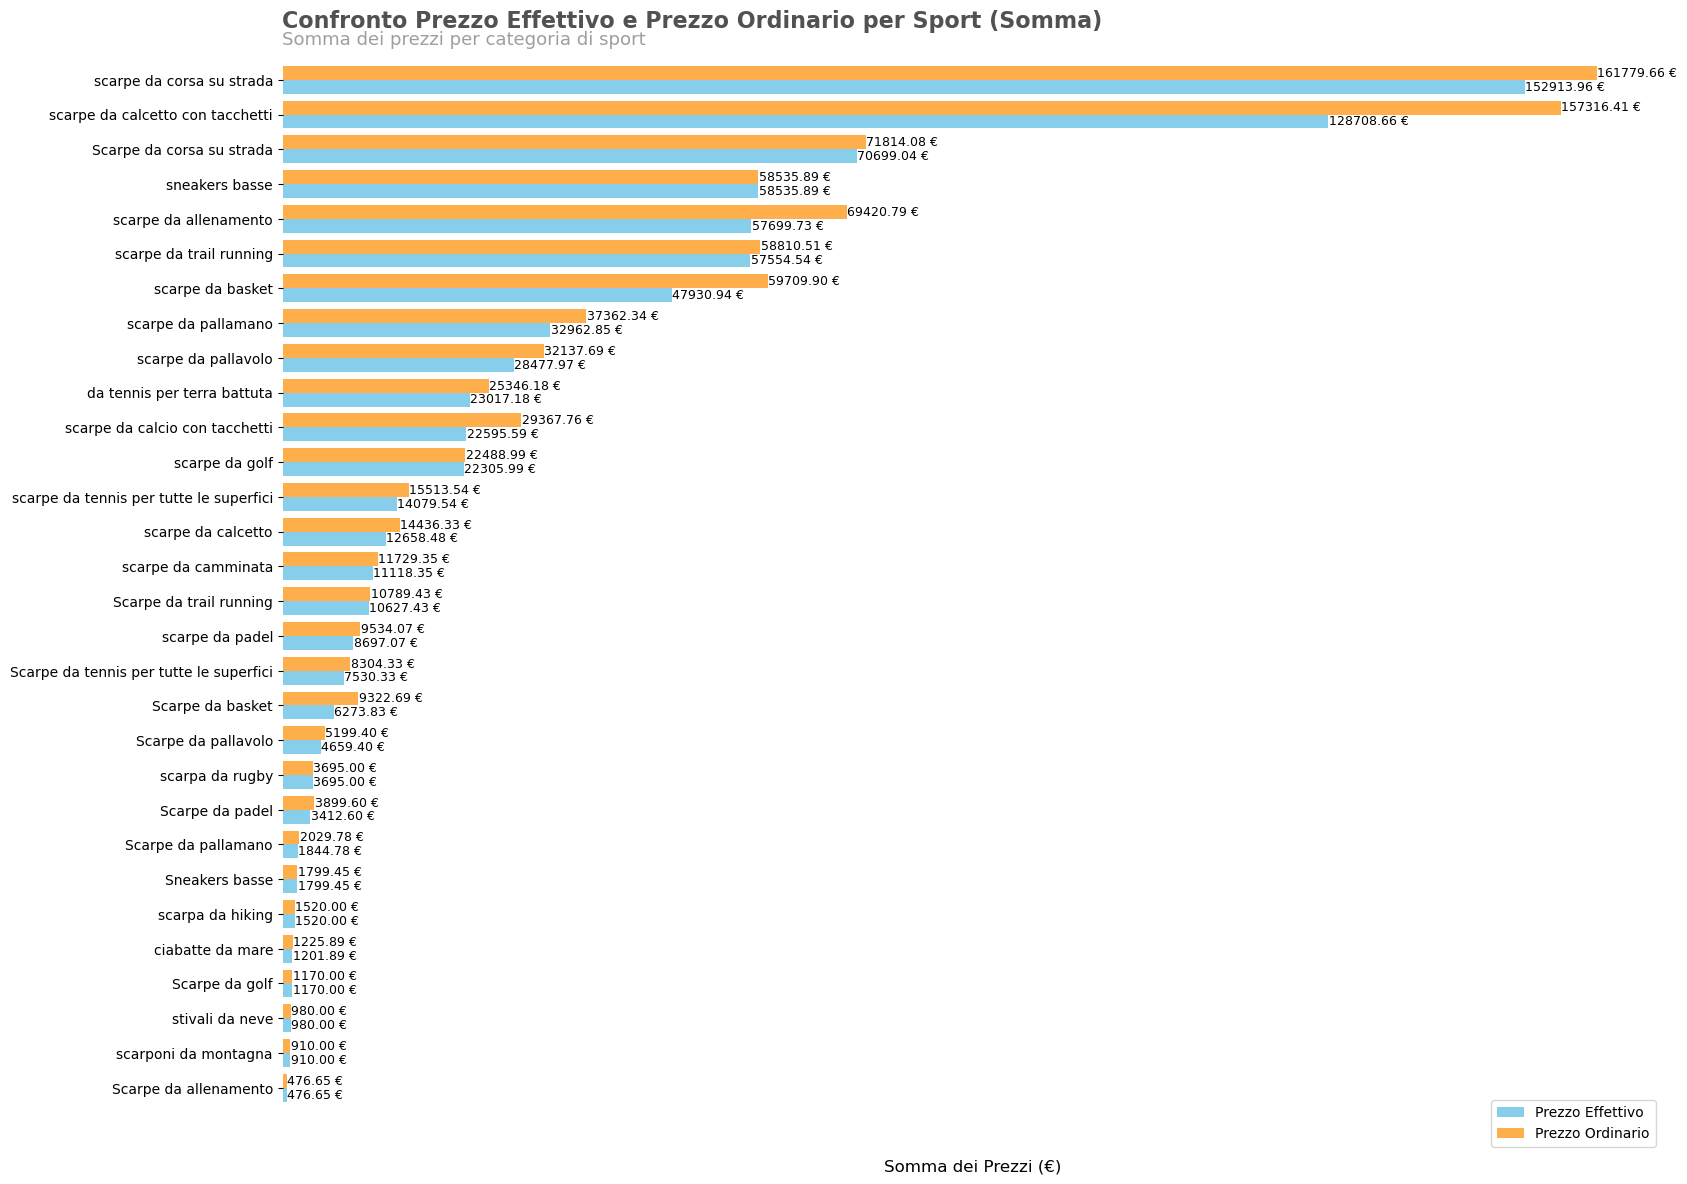

In [105]:
raggruppa_sport = df.groupby('sport')[['prezzo_effettivo', 'prezzo_ordinario']].sum()
raggruppa_sport = raggruppa_sport.sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])

# settiamo il font come sans-serif
plt.rcParams['font.family'] = 'sans-serif'

# settiamo i colori
grey = "#9E9E9E"
grey_text = "#515151"
effective_color = "skyblue"
ordinary_color = "darkorange"

# andiamo a creare la figura e il subplot
fig, ax = plt.subplots(figsize=(17, 13))

# prendiamo il Data per il plot
sports = raggruppa_sport.index
effective_prices = raggruppa_sport['prezzo_effettivo']
ordinary_prices = raggruppa_sport['prezzo_ordinario']

bar_width = 0.4
y_positions = np.arange(len(sports))

ax.barh(y_positions - bar_width/2, effective_prices, height=bar_width, color=effective_color, label="Prezzo Effettivo")
ax.barh(y_positions + bar_width/2, ordinary_prices, height=bar_width, color=ordinary_color, label="Prezzo Ordinario", alpha=0.7)

# Rimozione dei bordi del grafico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rimozione dei segni sull'asse x
ax.set_xticks(ticks=[])

# Imposta le didascalie dell'asse y
ax.set_yticks(y_positions)
ax.set_yticklabels(sports, fontsize=10)

# aggiungi il titolo
ax.text(-100, len(sports) - 0.5 + 1, 'Confronto Prezzo Effettivo e Prezzo Ordinario per Sport (Somma)', fontsize=16, color=grey_text, fontweight='bold') # Adjusted y position
ax.text(-100, len(sports) - 1 + 1, 'Somma dei prezzi per categoria di sport', fontsize=13, color=grey) # Adjusted y position

# aggiungi le etichette dei prezzi
for i, (effettivo, ordinario) in enumerate(zip(effective_prices, ordinary_prices)):
    ax.text(effettivo + 50, y_positions[i] - bar_width/2, f'{effettivo:.2f} €', va='center', ha='left', fontsize=9, color='black')
    ax.text(ordinario + 50, y_positions[i] + bar_width/2, f'{ordinario:.2f} €', va='center', ha='left', fontsize=9, color='black')

ax.set_xlabel("Somma dei Prezzi (€)", fontsize=12)
ax.legend(fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # aggiusta il layout
plt.show()

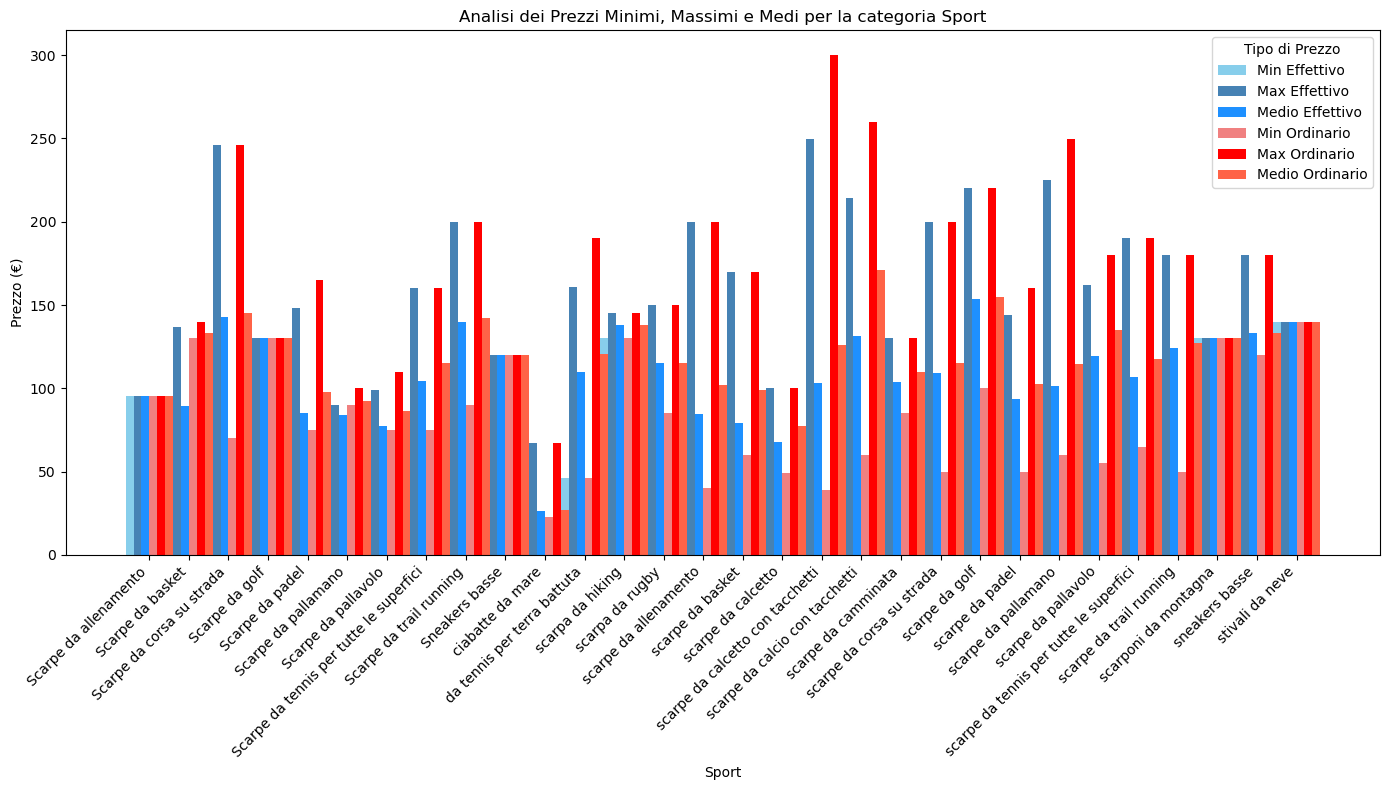

In [107]:
# Calcolo delle statistiche di prezzo per sport
prezzi_sport = df.groupby('sport').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.2

# Posizioni delle barre per ciascuna statistica di prezzo
pos_min_eff = np.arange(len(prezzi_sport))
pos_max_eff = [p + bar_width for p in pos_min_eff]
pos_med_eff = [p + bar_width * 2 for p in pos_min_eff]
pos_min_ord = [p + bar_width * 3 for p in pos_min_eff]
pos_max_ord = [p + bar_width * 4 for p in pos_min_eff]
pos_med_ord = [p + bar_width * 5 for p in pos_min_eff]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_sport['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_sport['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_sport['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_sport['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_sport['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_sport['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Sport')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport')
plt.xticks(pos_min_eff + bar_width * 2.5, prezzi_sport['sport'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

### Distribuzione del numero di prodotti per categoria di sport per vedere quali categorie hanno la maggiore offerta di prodotti da parte di Under Armour sul sito Zalando

In [110]:
# conteggio dei prodotti per categoria
conteggio = df.groupby('sport')['nome_prodotto'].count()
conteggio

sport
Scarpe da allenamento                         5
Scarpe da basket                             70
Scarpe da corsa su strada                   495
Scarpe da golf                                9
Scarpe da padel                              40
Scarpe da pallamano                          22
Scarpe da pallavolo                          60
Scarpe da tennis per tutte le superfici      72
Scarpe da trail running                      76
Sneakers basse                               15
ciabatte da mare                             46
da tennis per terra battuta                 210
scarpa da hiking                             11
scarpa da rugby                              32
scarpe da allenamento                       682
scarpe da basket                            605
scarpe da calcetto                          187
scarpe da calcetto con tacchetti           1247
scarpe da calcio con tacchetti              172
scarpe da camminata                         107
scarpe da corsa su strada         

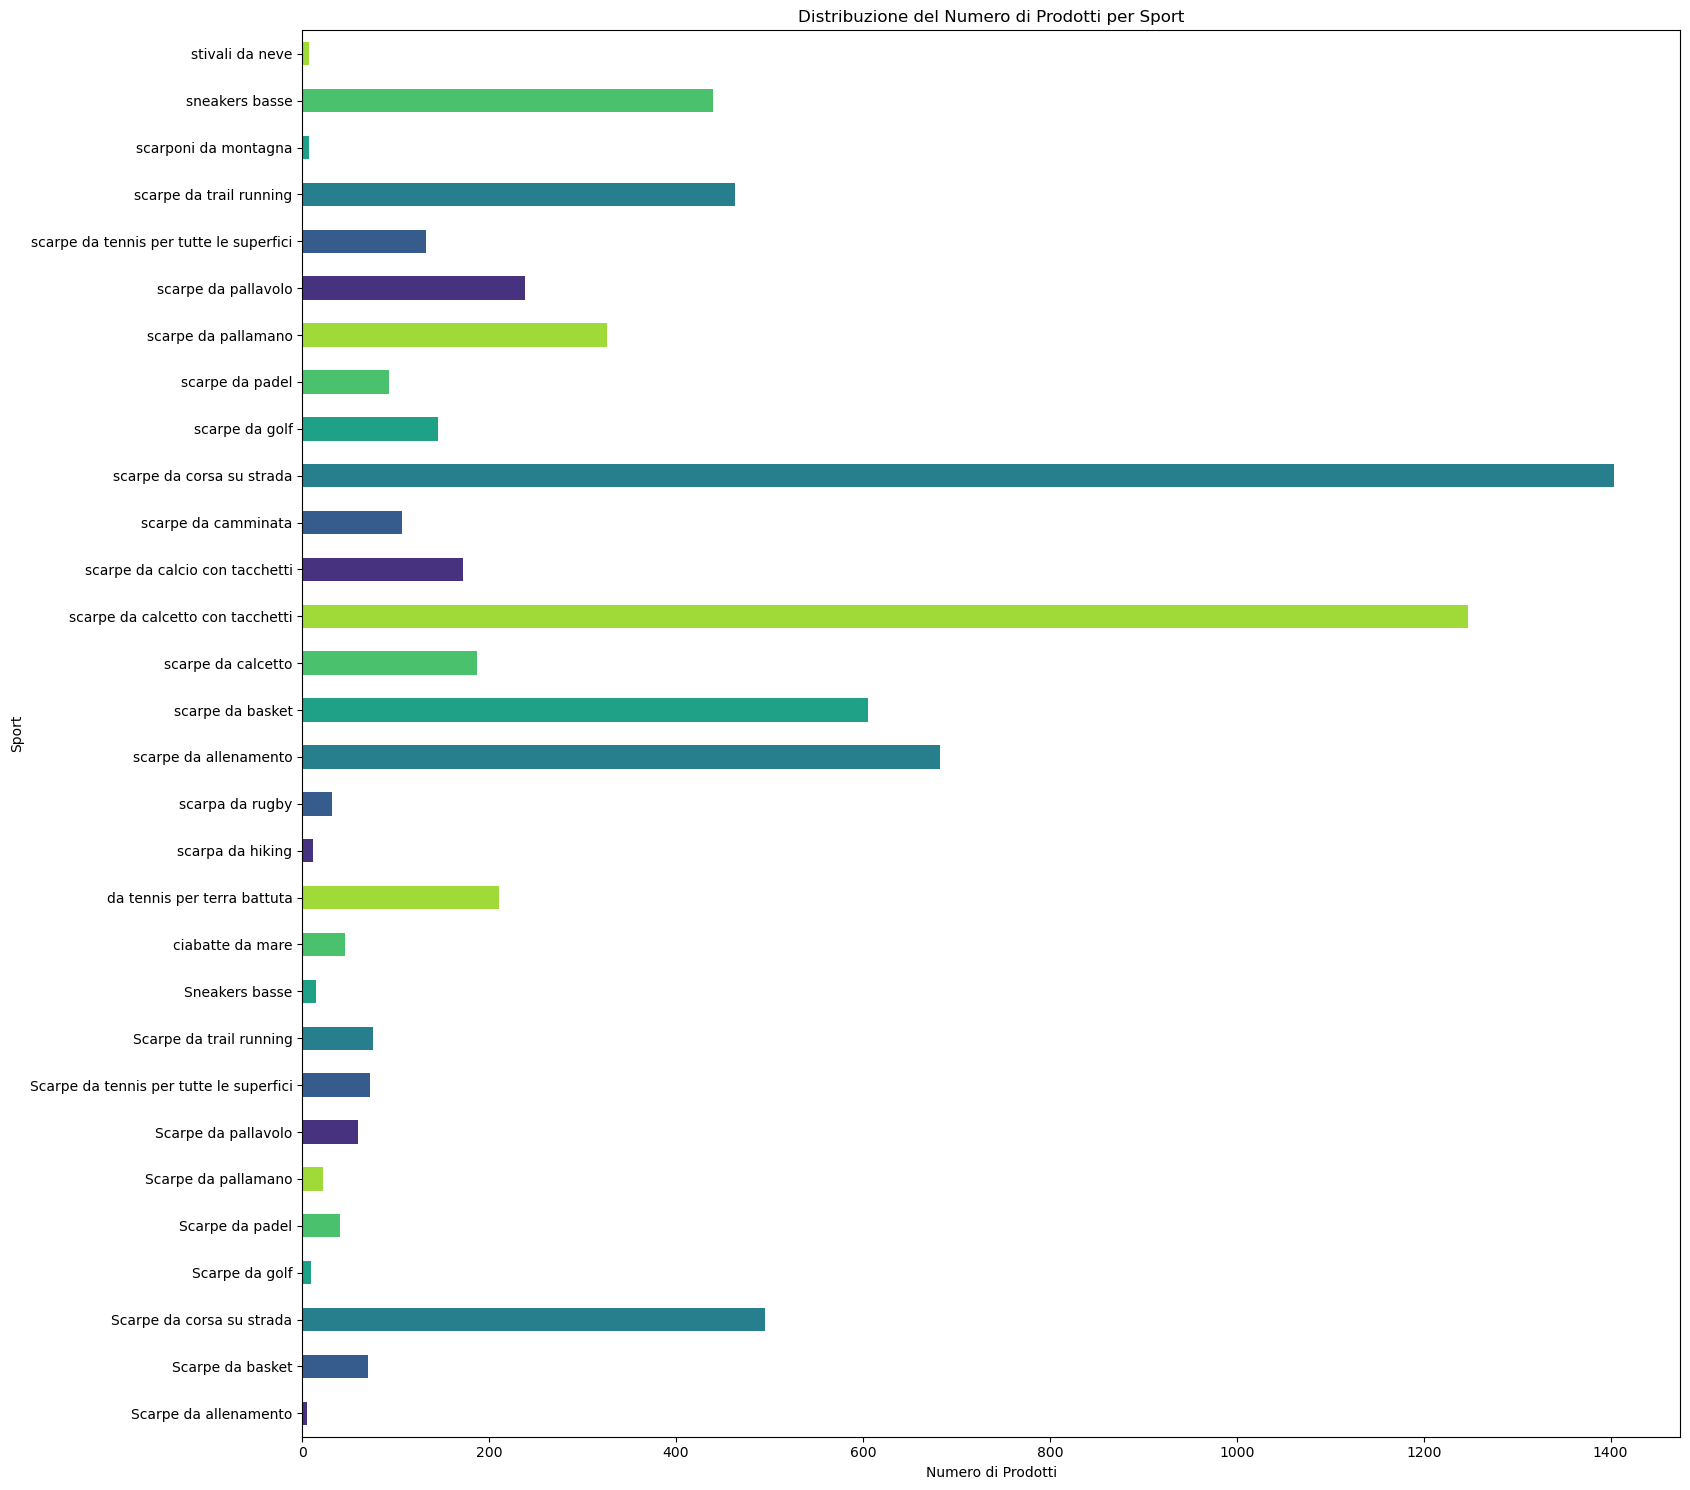

In [112]:
# Creazione del grafico a barre orizzontali
plt.figure(figsize=(17, 15))
conteggio.plot(kind='barh', color=sns.color_palette('viridis'))

# Aggiunta di etichette e titolo
plt.xlabel('Numero di Prodotti')
plt.ylabel('Sport')
plt.title('Distribuzione del Numero di Prodotti per Sport')

# Mostra il grafico
plt.tight_layout()
plt.show()

### Distribuzione dei prezzi per Categoria Sport sulla marca Under Armour in maniera tale che possiamo visualizzare e identificare eventuale categorie di Sport con prezzi variabili
### Abbiamo scelto di utilizzare un boxplot

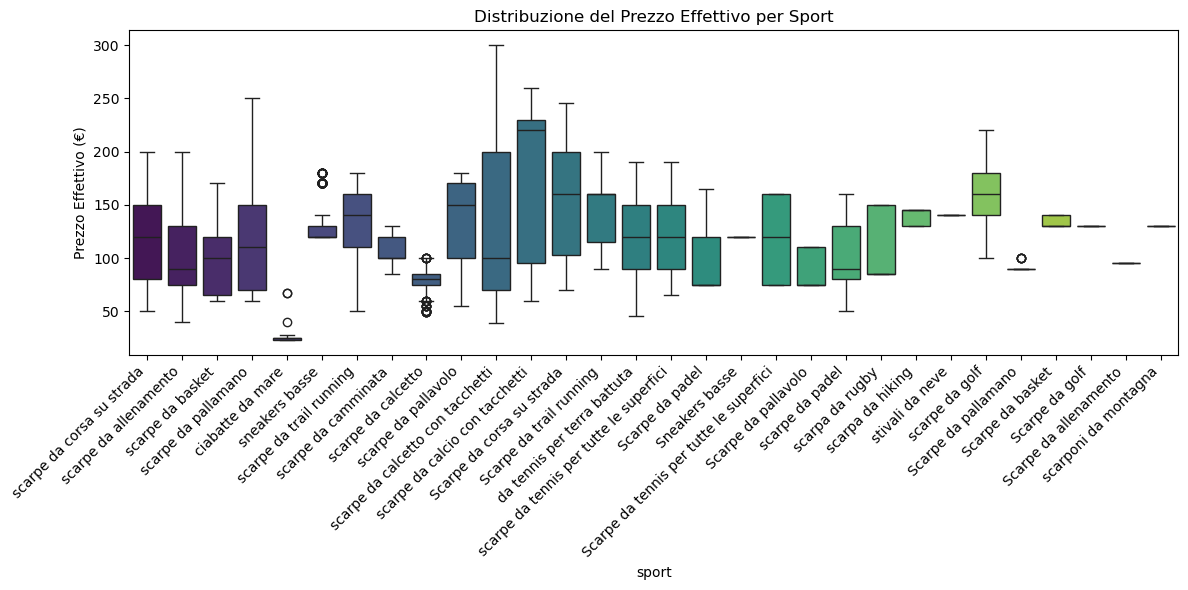

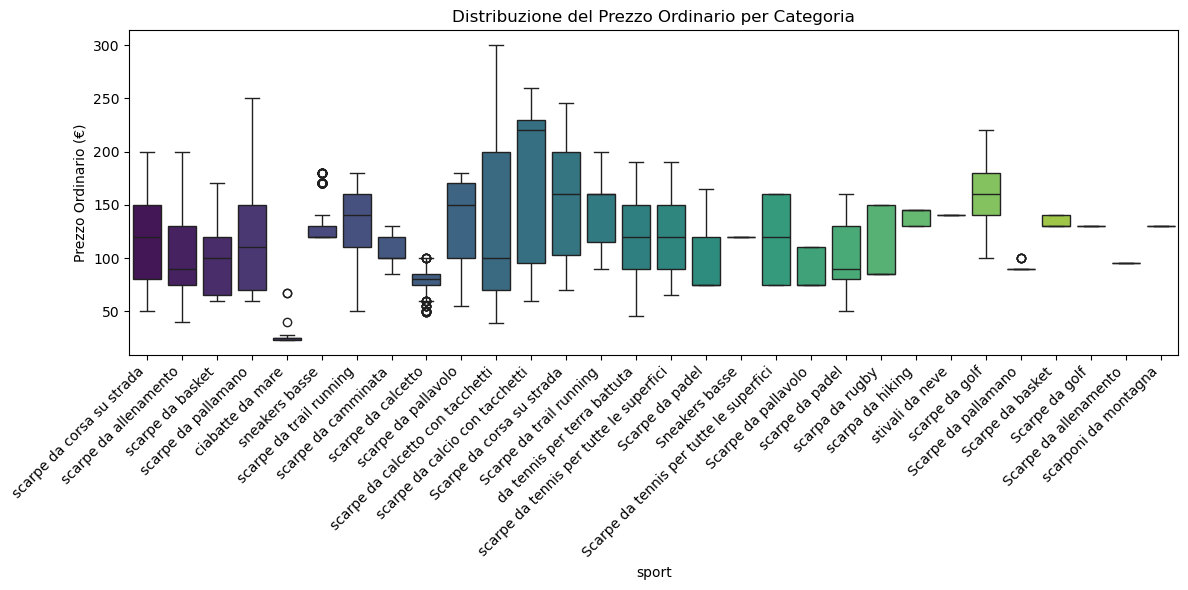

In [115]:
# Creazione del box plot per il prezzo effettivo per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=df, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Effettivo (€)')
plt.title('Distribuzione del Prezzo Effettivo per Sport')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()

# Creazione del box plot per il prezzo ordinario per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=df, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Ordinario (€)')
plt.title('Distribuzione del Prezzo Ordinario per Categoria')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()



### Analisi dei prezzi per comprendere la distribuzione generale dei prezzi di tutti i prodotti. 
### La scelta e di utilizzare un istogramma che e ottima per visualizzare i dati sui prezzi

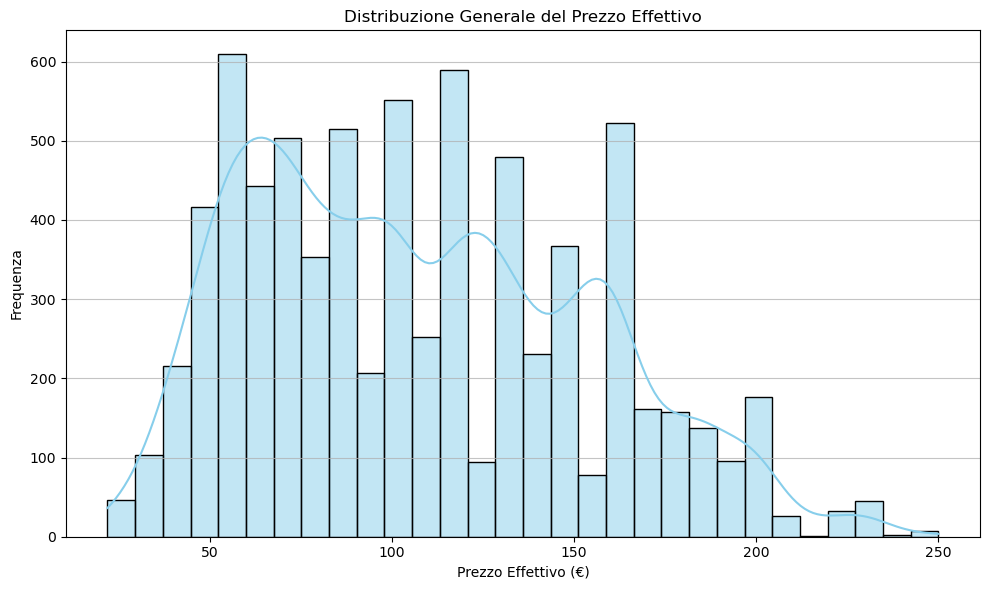

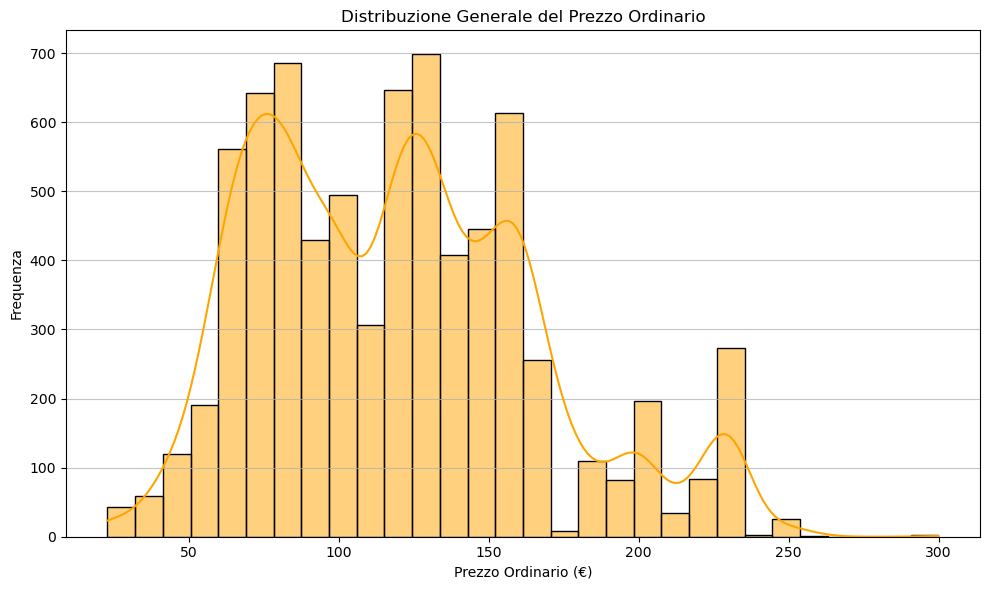

In [118]:
# Creazione dell'istogramma per il prezzo effettivo
plt.figure(figsize=(10, 6))
sns.histplot(df['prezzo_effettivo'], bins=30, kde=True, color='skyblue')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Effettivo (€)')
plt.ylabel('Frequenza')
plt.title('Distribuzione Generale del Prezzo Effettivo')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Creazione dell'istogramma per il prezzo ordinario
plt.figure(figsize=(10, 6))
sns.histplot(df['prezzo_ordinario'], bins=30, kde=True, color='orange')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Ordinario (€)')
plt.ylabel('Frequenza') # il numero di prodotti che hanno un prezzo all'interno di quell'intervallo
plt.title('Distribuzione Generale del Prezzo Ordinario')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

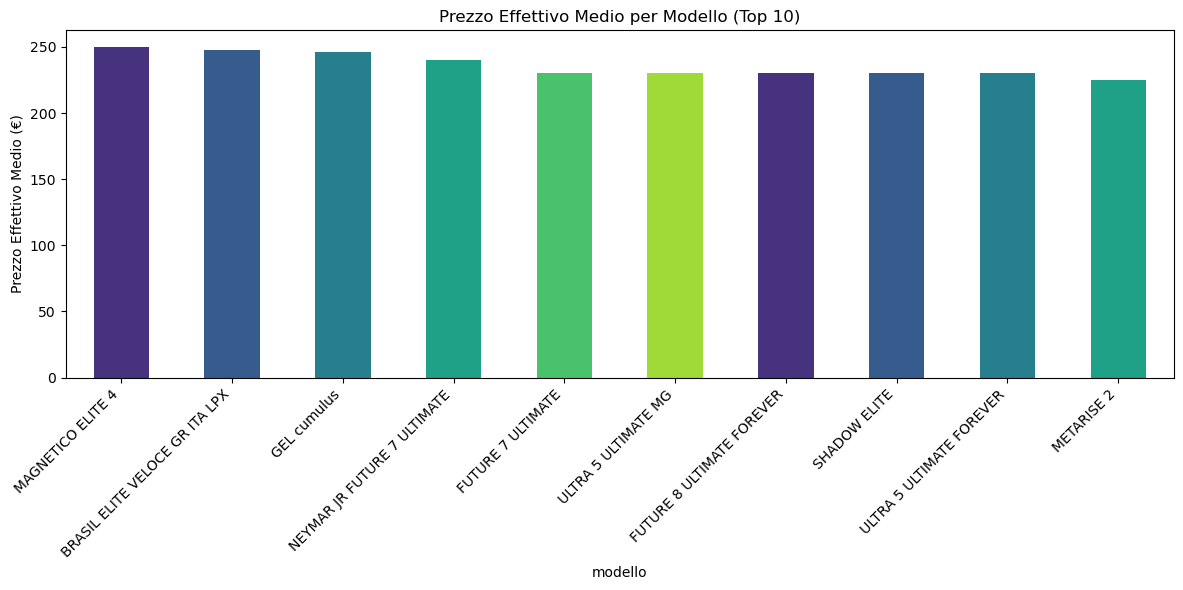

In [120]:
# Calcola il prezzo medio per modello
prezzo_medio_per_modello = df.groupby('modello')['prezzo_effettivo'].mean().sort_values(ascending=False)

# Se ci sono molti modelli, prendiamo solo i primi 10 per leggibilità
top_10_modelli = prezzo_medio_per_modello.head(10)

# Creazione del grafico a barre
plt.figure(figsize=(12, 6))
top_10_modelli.plot(kind='bar', color=sns.color_palette('viridis'))

# Aggiunta di etichette e titolo
plt.xlabel('modello')
plt.ylabel('Prezzo Effettivo Medio (€)')
plt.title('Prezzo Effettivo Medio per Modello (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analisi dei prezzi Minimi, Massimi e Medi per Modello con l'aiuto di un grafico a barre raggruppante per poter visualizzare le differenze e le tendenze dei prezzi tra le diverse modelli

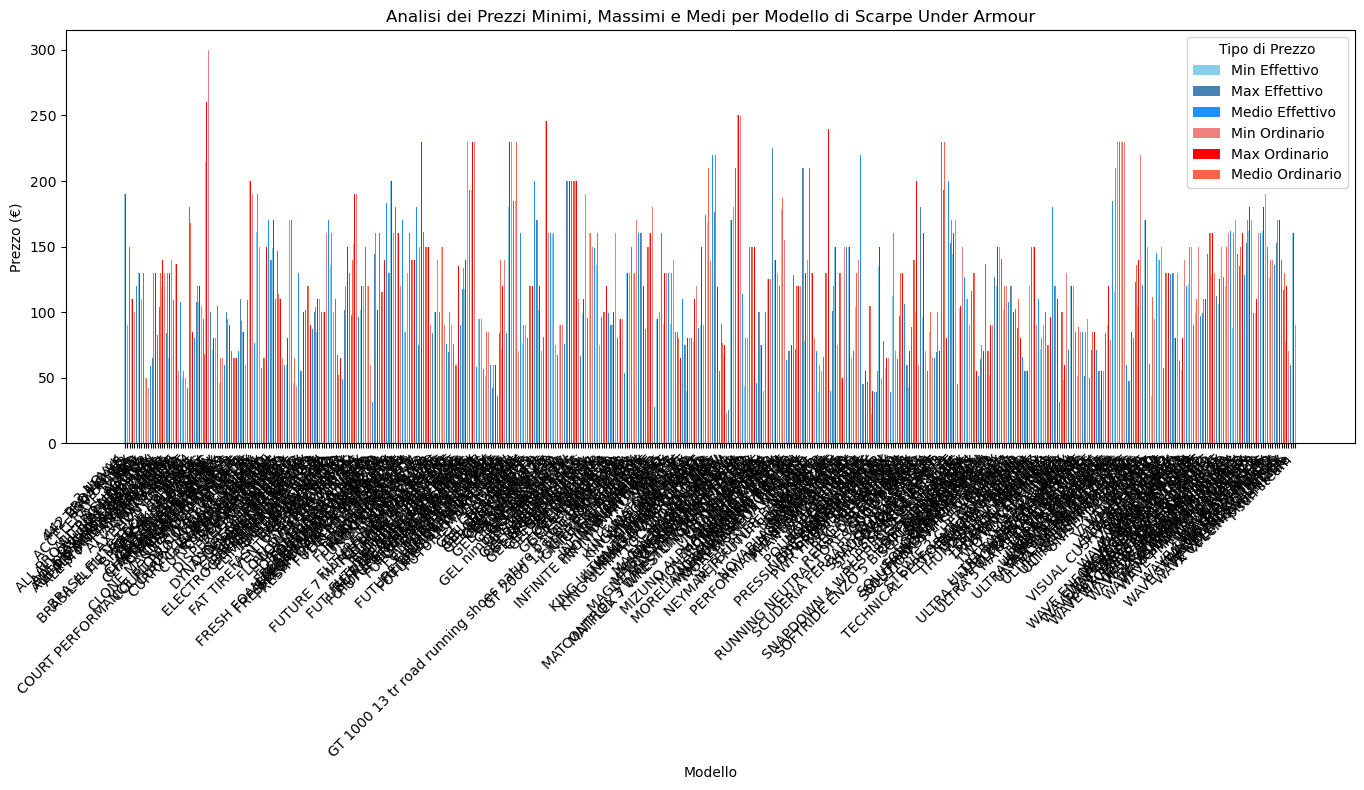

In [123]:
# Calcolo delle statistiche di prezzo per modello
prezzi_categoria = df.groupby('modello').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.1

# Posizioni delle barre per ciascuna statistica di prezzo
pos_min_eff = np.arange(len(prezzi_categoria))
pos_max_eff = [p + bar_width for p in pos_min_eff]
pos_med_eff = [p + bar_width * 2 for p in pos_min_eff]
pos_min_ord = [p + bar_width * 3 for p in pos_min_eff]
pos_max_ord = [p + bar_width * 4 for p in pos_min_eff]
pos_med_ord = [p + bar_width * 5 for p in pos_min_eff]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_categoria['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_categoria['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_categoria['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_categoria['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_categoria['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_categoria['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Modello')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per Modello di Scarpe Under Armour')
plt.xticks(pos_min_eff + bar_width * 2.5, prezzi_categoria['modello'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

In [72]:
df

,Unnamed: 0,categoria,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori
0,0,Scarpini Sportivi Under Armour,UNDER ARMOUR,CHARGED COMMIT TR 4 - Scarpe da allenamento - ...,67.99,79.99,https://www.zalando.it/under-armour-charged-co...,CHARGED COMMIT TR 4,Scarpe da allenamento,black
1,1,Scarpini Sportivi Under Armour,UNDER ARMOUR,REIGN 6 - Scarpe da allenamento - anthracite/b...,118.99,139.99,https://www.zalando.it/under-armour-tribase-re...,REIGN 6,Scarpe da allenamento,anthracite/black/steel
2,2,Scarpini Sportivi Under Armour,UNDER ARMOUR,REIGN 6 - Scarpe da allenamento - black,139.99,139.99,https://www.zalando.it/under-armour-tribase-re...,REIGN 6,Scarpe da allenamento,black
3,3,Scarpini Sportivi Under Armour,UNDER ARMOUR,COURT 96 - Scarpe da allenamento - black,69.99,99.99,https://www.zalando.it/under-armour-sport-cour...,COURT 96,Scarpe da allenamento,black
4,4,Scarpini Sportivi Under Armour,UNDER ARMOUR,PHANTOM 4 UNISEX - Scarpe da corsa su strada -...,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,PHANTOM 4 UNISEX,Scarpe da corsa su strada,black
...,...,...,...,...,...,...,...,...,...,...
189,189,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da corsa su strada - white distant gray...,95.97,160.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da corsa su strada,white distant gray halo gray
190,190,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da corsa su strada - white,95.97,160.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da corsa su strada,white
191,191,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da allenamento - grn vert,48.75,48.75,https://www.zalando.it/under-armour-sneakers-b...,Unknown,Scarpe da allenamento,grn vert
192,192,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da camminata - black,100.00,100.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da camminata,black
